In [1]:
#import seaborn as sns
import matplotlib.pyplot as pl
import glob
import pandas as pd
from datetime import datetime
path = "/Users/francescameneghello/Documents/GitHub/rl-rims/baseline/BPI_Challenge_2012_W_Two_TS/results/*FIFO.csv"
all_file = glob.glob(path)

In [2]:
### file baseline simulation
all_file.sort(reverse = False)
all_file

['/Users/francescameneghello/Documents/GitHub/rl-rims/baseline/BPI_Challenge_2012_W_Two_TS/results/simulated_log_LSTM_BPI_Challenge_2012_W_Two_TS_0_FIFO.csv',
 '/Users/francescameneghello/Documents/GitHub/rl-rims/baseline/BPI_Challenge_2012_W_Two_TS/results/simulated_log_LSTM_BPI_Challenge_2012_W_Two_TS_1_FIFO.csv']

In [206]:
import pm4py
import warnings
import glob
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


def cycle_wait_SIM(path):
    df = pd.read_csv(path)
    resources = set(df['resource'])
    simulated_log = pm4py.format_dataframe(df, case_id='id_case', activity_key='activity',
                                                   timestamp_key='end_time', start_timestamp_key='start_time')
    simulated_log = pm4py.convert_to_event_log(simulated_log)
    CYCLE_TIME = []
    for trace in simulated_log:
        CYCLE_TIME.append((trace[-1]['end_time'] - trace[0]['start_time']).total_seconds())
    WAIT_TIME = []
    for trace in simulated_log:
        for i, event in enumerate(trace):
            if i > 0:
                WAIT_TIME.append((event['start_time']- trace[i-1]['end_time']).total_seconds())
    PROCESSING_TIME = []
    for trace in simulated_log:
        for event in trace:
            if event['concept:name']!= 'start':
                PROCESSING_TIME.append((event['end_time']- event['start_time']).total_seconds())
            
    return CYCLE_TIME, WAIT_TIME, PROCESSING_TIME

POLICY = ['FIFO_case', 'SPT']
CYCLE_TIME_tot = {'RANDOM': [], 'FIFO_activity': [], 'FIFO_case': [], 'SPT': []}
WAIT_TIME_tot = {'RANDOM': [], 'FIFO_activity': [], 'FIFO_case': [], 'SPT': []}
PROCESSING_TIME_tot = {'RANDOM': [], 'FIFO_activity': [], 'FIFO_case': [], 'SPT': []}
for p in POLICY:
    path = '/Users/francescameneghello/Documents/GitHub/RL_integration/output/output_BPI_Challenge_2017_W_Two_TS/simulated_log_BPI_Challenge_2017_W_Two_TS_' + p + '*.csv'
    #path = '/Users/francescameneghello/Documents/GitHub/RL_integration/output/output_ConsultaDataMining201618/CALENDAR/' + p + '/sim*.csv'
    all_file = glob.glob(path)
    for file in all_file:
        CYCLE_TIME, WAIT_TIME, PROCESSING_TIME = cycle_wait_SIM(file)
        CYCLE_TIME_tot[p] += CYCLE_TIME
        WAIT_TIME_tot[p] += WAIT_TIME
        PROCESSING_TIME_tot[p] += PROCESSING_TIME
    print('POLICY:', p)
    print('MEAN CYCLE TIME:', np.mean(CYCLE_TIME_tot[p]))

POLICY: FIFO_case
MEAN CYCLE TIME: 9983.005
POLICY: SPT
MEAN CYCLE TIME: 10745.2165


In [118]:
policy = list(CYCLE_TIME_tot.keys())
complete = []
uncomplete = []
for key in CYCLE_TIME_tot:
    tot = 0
    for cycle in CYCLE_TIME_tot[key]:
        if cycle < 21600:
            tot += 1
    complete.append(tot)
    uncomplete.append(len(CYCLE_TIME_tot[key])-(tot))
complete, uncomplete

([6422, 6422, 6368, 5921], [2194, 2194, 2248, 2695])

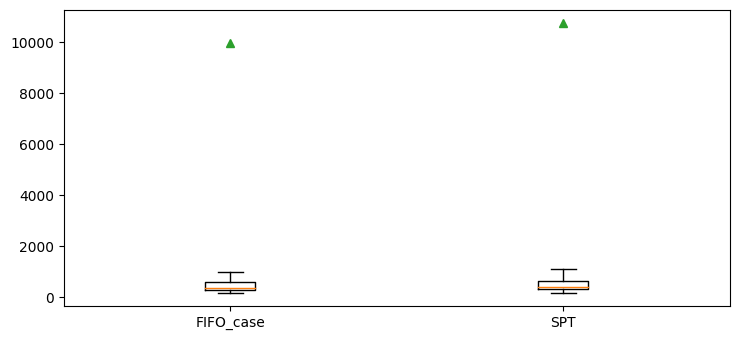

In [207]:
############ CYCLE TIME #################

#CYCLE_TIME_tot['RANDOM'], CYCLE_TIME_tot['FIFO_activity'],
bp = plt.boxplot([
                  CYCLE_TIME_tot['FIFO_case'], CYCLE_TIME_tot['SPT']], labels=POLICY, showfliers = False, showmeans=True)

In [89]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

year = ['SJF', 'LIFO', 'FIFO']
issues_addressed = [76, 77, 75]
issues_pending = [24, 23, 25]

b1 = plt.barh(year, issues_addressed, color="green")

b2 = plt.barh(year, issues_pending, left=issues_addressed, color="red")

#plt.legend([b1, b2], ["Completed", "Pending"], title="Issues", loc="upper right")

plt.show()

8616

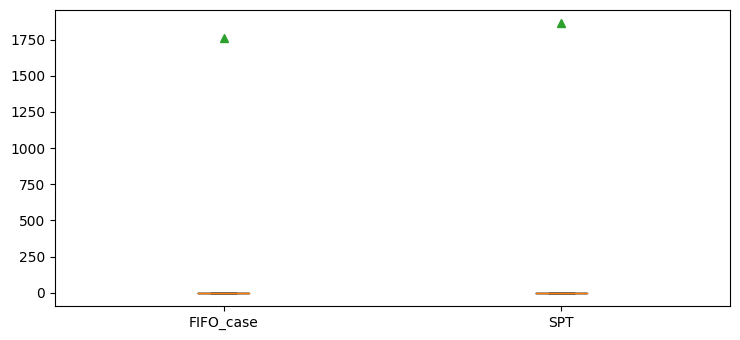

In [209]:
############ WAITING TIME #################
bp = plt.boxplot([WAIT_TIME_tot['RANDOM'], WAIT_TIME_tot['FIFO_activity'],
                  WAIT_TIME_tot['FIFO_case'], WAIT_TIME_tot['SPT']], labels=POLICY, showfliers = False, showmeans=True)

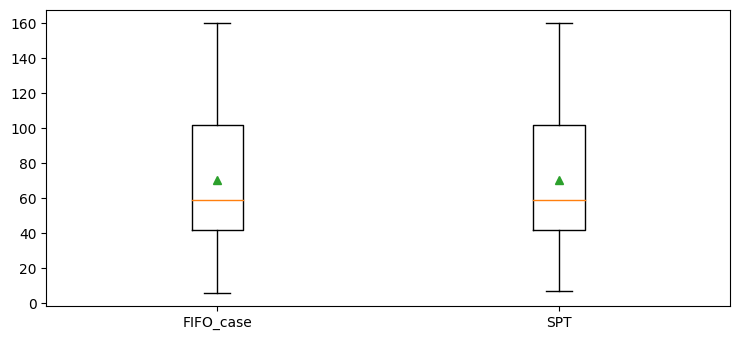

In [210]:
############ PROCESSING TIME #################
bp = plt.boxplot([PROCESSING_TIME_tot['RANDOM'], PROCESSING_TIME_tot['FIFO_activity'],
                  PROCESSING_TIME_tot['FIFO_case'], PROCESSING_TIME_tot['SPT']], labels=POLICY, showfliers = False, showmeans=True)

<AxesSubplot:xlabel='policy', ylabel='values'>

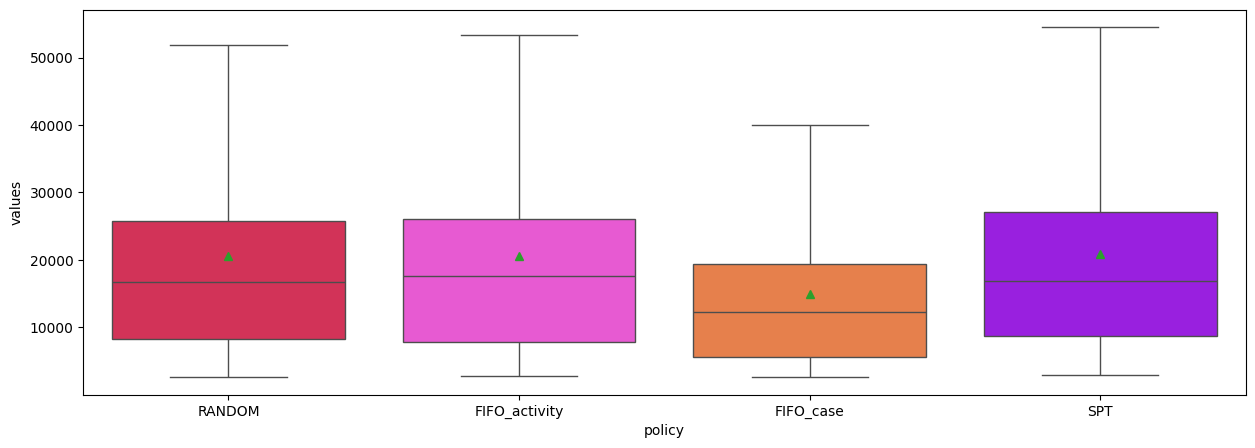

In [63]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
with open('/Users/francescameneghello/Documents/GitHub/RL_integration/output/output_confidential_1000/CALENDAR/results.json') as file:
    results = json.load(file)
    
   
    
results_values = {'policy': [], 'values': []}
for key in results:
    results_values['policy'] += [key] * len(results[key]['values'])
    results_values['values'] += results[key]['values']


#data = pd.DataFrame(results_values)
#data = np.array(data)
#plt.boxplot(data, labels=results_values.keys())
#plt.ylabel('Cycle time')
#plt.xlabel('Policies')

palette = {
    'RANDOM': "#ed184a",
    'FIFO_activity': "#ff42e2",
    'FIFO_case': "#ff7833",
    'SPT':"#a200ff"
}


df = pd.DataFrame(results_values)

# Figure Size
fig = plt.figure(figsize =(15, 5))
    
sns.boxplot(x='policy', y='values', data=df, order=['RANDOM', 'FIFO_activity', 'FIFO_case', 'SPT'], showmeans=True, palette = palette, showfliers = False)

In [25]:
with open('/Users/francescameneghello/Documents/GitHub/RL_integration/output/output_confidential_1000/NOT_CALENDAR/results.json') as file:
    results = json.load(file)
len(results['FIFO_activity']['values'])

1590

In [29]:
for key in results:
    print(key, len(results[key]['values']))

FIFO_activity 1590
FIFO_case 1590
RANDOM 1590
SPT 1590


In [36]:
sorted([5,2,3,4])

[2, 3, 4, 5]

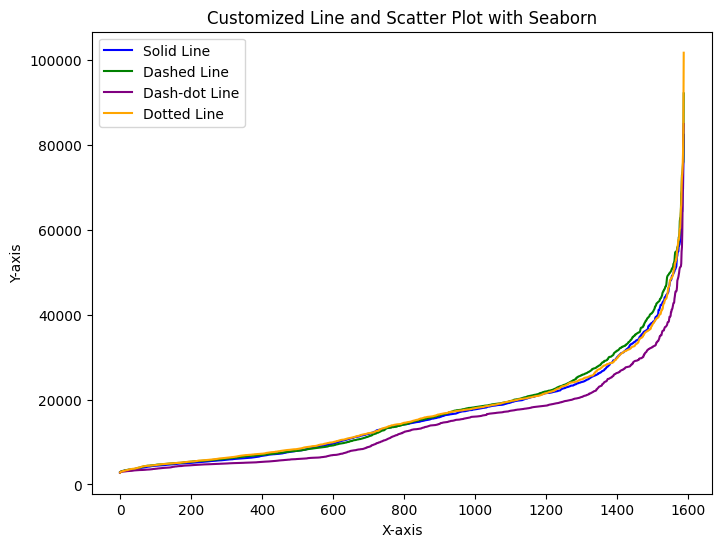

In [39]:
plt.figure(figsize=(8, 6))

x = [*range(0, len(results['FIFO_activity']['values']), 1)] 


# Solid line with circle markers
sns.lineplot(x=x, y=sorted(results['RANDOM']['values']), linestyle='-', markersize=8, label='Solid Line', color='blue') 

# Dashed line with square markers
sns.lineplot(x=x, y=sorted(results['FIFO_activity']['values']), linestyle='-', markersize=8, label='Dashed Line', color='green') 

# Dash-dot line with triangle up markers
sns.lineplot(x=x, y=sorted(results['FIFO_case']['values']), linestyle='-',  markersize=8, label='Dash-dot Line', color='purple') 

# Dotted line with asterisk markers
sns.lineplot(x=x, y=sorted(results['SPT']['values']), linestyle='-', markersize=8, label='Dotted Line', color='orange') 

plt.title('Customized Line and Scatter Plot with Seaborn') # Add a title
plt.xlabel('X-axis') # x-axis name
plt.ylabel('Y-axis') # x-axis name
plt.legend(loc='upper left') # Add a legend
plt.show() # Display the graph

In [166]:
import pm4py
simulated_log = pd.read_csv('/Users/francescameneghello/Documents/GitHub/RL_integration/example/Productions/Productions.csv')
simulated_log = pm4py.format_dataframe(simulated_log, case_id='Case ID', activity_key='Activity',
                                       timestamp_key='Complete Timestamp', start_timestamp_key='Start Timestamp')
simulated_log = pm4py.convert_to_event_log(simulated_log)
simulated_log[0]

{'attributes': {'concept:name': 'Case1'}, 'events': [{'Case ID': 'Case1', 'Activity': 'Turning & Milling', 'Resource': 'ID4932', 'Start Timestamp': Timestamp('2012-01-30 05:24:00+0000', tz='UTC'), 'Complete Timestamp': Timestamp('2012-01-30 11:43:00+0000', tz='UTC'), 'Variant': 'Variant 7', 'Variant index': 7, 'lifecycle:transition': 'complete', 'org:resource': 'ID4932', 'variant': 'Variant 7', 'variant-index': 7, 'creator': 'Fluxicon Disco', 'concept:name': 'Turning & Milling', 'time:timestamp': Timestamp('2012-01-30 11:43:00+0000', tz='UTC'), '@@index': 0, 'start_timestamp': Timestamp('2012-01-30 05:24:00+0000', tz='UTC')}, '..', {'Case ID': 'Case1', 'Activity': 'Packing', 'Resource': 'ID4820', 'Start Timestamp': Timestamp('2012-02-17 06:00:00+0000', tz='UTC'), 'Complete Timestamp': Timestamp('2012-02-17 07:00:00+0000', tz='UTC'), 'Variant': 'Variant 7', 'Variant index': 7, 'lifecycle:transition': 'complete', 'org:resource': 'ID4820', 'variant': 'Variant 7', 'variant-index': 7, 'crea

In [167]:
pm4py.write_xes(simulated_log, '/Users/francescameneghello/Documents/GitHub/RL_integration/example/Productions/Productions.xes')

exporting log, completed traces ::   0%|          | 0/225 [00:00<?, ?it/s]